## NEW CODEBOOK FOR SCHOOL PERFORMANCE DATA

- The aim of this codebook is to create a more comprehensive data set by joining SEDA data and NCES data set. 

**Identifying the variable of interest to be decided...**


In [1]:
# Calling all the packages in python
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view

## Details from SEDA Document
[pdf](https://stacks.stanford.edu/file/druid:db586ns4974/seda_documentation_4.0.pdf)

- Test score data files contain information about the average academic achievement as measured by standardized test scores administered in 3rd through 8 th grade in mathematics and Reading Language Arts (RLA) over the 2008-09 through 2017-18 school years.

- In each file there are variables corresponding to the average test score in the middle grade of the data, the average “learning rate” across grades (grade slope), the “trend” in the test scores across cohorts (cohort slope), and the difference between math and RLA test scores (math slope).

**We might be interested in the average test scores data??**

## SEDA Data

In [2]:
# Path for the learning outcomes
SEDA_Outcomes = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_school_pool_gcs_4.0.csv",converters={"sedasch":str})

In [3]:
SEDA_Outcomes.sedasch=SEDA_Outcomes.sedasch.str.rjust(12, "0")

In [4]:
SEDA_Outcomes.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_ol_se,gcs_mn_mth_ol_se,gcs_mn_avg_eb,gcs_mn_coh_eb,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se
0,010000201667,Camps,1,AL,all,all,7.5,0,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,010000201670,Det Ctr,1,AL,all,all,7.5,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,010000201705,Wallace Sch - Mt Meigs Campus,1,AL,all,all,7.0,0,98,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010000201706,McNeel Sch - Vacca Campus,1,AL,all,all,7.0,0,118,12,...,NaN,NaN,2.632403,NaN,NaN,NaN,0.469368,NaN,NaN,NaN
4,010000500870,Albertville Middle School,1,AL,all,all,7.5,0,12520,39,...,NaN,0.16536,6.363105,-0.026981,NaN,-0.256272,0.082592,0.027416,NaN,0.155361


In [5]:
SEDA_Outcomes.columns

Index(['sedasch', 'sedaschname', 'fips', 'stateabb', 'subcat', 'subgroup',
       'gradecenter', 'gap', 'tot_asmts', 'cellcount', 'mn_asmts',
       'gcs_mn_avg_ol', 'gcs_mn_coh_ol', 'gcs_mn_grd_ol', 'gcs_mn_mth_ol',
       'gcs_mn_avg_ol_se', 'gcs_mn_coh_ol_se', 'gcs_mn_grd_ol_se',
       'gcs_mn_mth_ol_se', 'gcs_mn_avg_eb', 'gcs_mn_coh_eb', 'gcs_mn_grd_eb',
       'gcs_mn_mth_eb', 'gcs_mn_avg_eb_se', 'gcs_mn_coh_eb_se',
       'gcs_mn_grd_eb_se', 'gcs_mn_mth_eb_se'],
      dtype='object')

### Description From the Codebook 

sedasch	  -SEDA School ID

sedaschname	  -School Name

fips	-State FIPS Code

stateabb	-State Abbreviation

subcat	-Subgroup Category

subgroup	-Subgroup Case

gradecenter	  -Grade used for pooled centering

gap	 -Gap Estimate Indicator

tot_asmts	-Total number of math + RLA tests for pooled estimates

cellcount	-Total number of math + RLA cells for pooled estimates

mn_asmts	-Per grade number of math + RLA cells for pooled estimates (tot_asmts/cellcount)

**gcs_mn_avg_ol --	Maybe of interest**

- School Mean Ach, Math&RLA, OLS est, GCS 
- School Mean SEDA EDFacts Test-Based Achievement  Math&RLA, Ordinary Least Squares (OLS) estimate,  Grade-Cohort Scale (GCS) 

gcs_mn_coh_ol	-School Cohort Slope of Mean Ach, Math&RLA, OLS est, GCS



In [6]:
type(SEDA_Outcomes)

pandas.core.frame.DataFrame

## Converting SEDA into GeoDataframe

- We need schools data from NCES
- Obtaining geometry points from NCES and joining it with SEDA
- We will also retain county level information



In [7]:
# Retrieving data from NCES
schools = gpd.read_parquet("s3://spatial-ucr/nces/schools/schools_1819.parquet")


In [8]:
schools.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20617 34.26019)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20488 34.26223)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22014 34.27332)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22181 34.25270)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.19329 34.28985)


In [9]:
sch_geoms = schools[['NCESSCH','CNTY','NMCNTY', 'geometry']]

In [10]:
sch_geoms.head()

,NCESSCH,CNTY,NMCNTY,geometry
0,010000500870,01095,Marshall County,POINT (-86.20617 34.26019)
1,010000500871,01095,Marshall County,POINT (-86.20488 34.26223)
2,010000500879,01095,Marshall County,POINT (-86.22014 34.27332)
3,010000500889,01095,Marshall County,POINT (-86.22181 34.25270)
4,010000501616,01095,Marshall County,POINT (-86.19329 34.28985)


In [11]:
# Merge the SEDA_new to NCES index
SEDA_N = SEDA_Outcomes.merge(sch_geoms, left_on="sedasch", right_on= "NCESSCH")

In [12]:
SEDA_N.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
0,010000500870,Albertville Middle School,1,AL,all,all,7.5,0,12520,39,...,NaN,-0.256272,0.082592,0.027416,NaN,0.155361,010000500870,01095,Marshall County,POINT (-86.20617 34.26019)
1,010000500879,Evans Elementary School,1,AL,all,all,5.5,0,13619,40,...,NaN,-0.236166,0.081163,0.027231,NaN,0.152999,010000500879,01095,Marshall County,POINT (-86.22014 34.27332)
2,010000500889,Albertville Elementary School,1,AL,all,all,3.5,0,14970,40,...,NaN,-0.195711,0.081380,0.027364,NaN,0.153391,010000500889,01095,Marshall County,POINT (-86.22181 34.25270)
3,010000600193,Kate Duncan Smith DAR Middle,1,AL,all,all,6.5,0,8689,80,...,0.923386,-0.428483,0.067971,0.023102,0.062779,0.130031,010000600193,01095,Marshall County,POINT (-86.25409 34.53372)
4,010000600872,Asbury High School,1,AL,all,all,5.5,0,5413,70,...,0.930093,-0.200473,0.088643,0.025378,0.046480,0.141508,010000600872,01095,Marshall County,POINT (-86.14202 34.36255)


In [13]:
# Converting the data into GeoDataFrame
SEDA_N= gpd.GeoDataFrame(SEDA_N)

In [14]:
# Checking for Datatype
type(SEDA_N)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

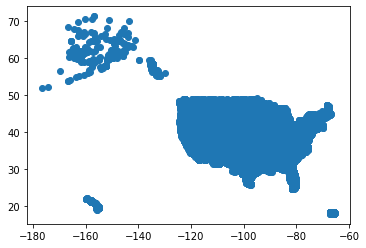

In [15]:
SEDA_N.plot()

## Shrinking Dataset for California

In [16]:
# Subset of the california schools from the US data
CA_sch = SEDA_N[SEDA_N.stateabb == "CA"]
CA_sch.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
3485,060000107534,Meadowlark Elementary,6,CA,all,all,4.0,0,3815,51,...,1.090237,-0.257467,0.086470,0.027348,0.093535,0.161691,060000107534,06037,Los Angeles County,POINT (-118.18562 34.47432)
3486,060000109444,High Desert,6,CA,all,all,7.0,0,4383,40,...,1.032473,-0.524962,0.094858,0.032063,0.094322,0.183542,060000109444,06037,Los Angeles County,POINT (-118.19474 34.49137)
3487,060000113828,Albert Einstein Acad Ltrs Arts Scis - Aqua Dul...,6,CA,all,all,5.5,0,608,27,...,NaN,NaN,0.326625,NaN,NaN,NaN,060000113828,06037,Los Angeles County,POINT (-118.33198 34.48820)
3488,060000608773,Manor Elementary,6,CA,all,all,4.0,0,3189,51,...,1.272235,-0.969830,0.089080,0.029193,0.096317,0.166007,060000608773,06041,Marin County,POINT (-122.59403 37.99720)
3489,060000608774,White Hill Middle,6,CA,all,all,7.0,0,8468,38,...,1.026197,-0.611043,0.095309,0.029214,0.099003,0.175254,060000608774,06041,Marin County,POINT (-122.60640 38.00312)


## Creating dataframe at County Level

Since we are interested in comparing Riverside County with 2 coastal counties for example Orange County and LA county.We can use the CNTY variable that has states fips code for each county.

States Fips 
- Riverside_county = 06065
- OC = 06059
- LAcounty =  06037


In [17]:
# Creating GEOdataframe for only Riverside County
Riv_schools = CA_sch[CA_sch.CNTY == '06065']
Riv_schools.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
3593,060002702451,Tuscany Hills Elementary,6,CA,all,all,4.0,0,6622,54,...,0.966089,-0.456324,0.077796,0.025330,0.086952,0.147377,060002702451,06065,Riverside County,POINT (-117.28897 33.68620)
3594,060002702452,Donald Graham Elementary,6,CA,all,all,4.5,0,4450,52,...,0.851025,-0.155221,0.086146,0.026827,0.079418,0.153178,060002702452,06065,Riverside County,POINT (-117.25699 33.60594)
3595,060002705011,David A. Brown Middle,6,CA,all,all,7.0,0,14011,44,...,0.912412,-0.581169,0.081987,0.025659,0.084094,0.156177,060002705011,06065,Riverside County,POINT (-117.27617 33.59164)
3596,060002707605,William Collier Elementary,6,CA,all,all,4.0,0,5382,54,...,0.688857,-0.310582,0.076521,0.024574,0.086437,0.145329,060002707605,06065,Riverside County,POINT (-117.30098 33.61655)
3597,060002709490,Elsinore Elementary,6,CA,all,all,4.0,0,4931,54,...,0.838429,-0.423913,0.080091,0.025679,0.089638,0.151112,060002709490,06065,Riverside County,POINT (-117.33232 33.67245)


In [18]:
#The number gradecenter in each city of Riverside County:
Riv_schools.groupby("gradecenter").size()

gradecenter
3.5      1
4.0    155
4.5    105
5.0      3
5.5     18
6.5      3
7.0     64
7.5     20
dtype: int64

In [43]:
Riv_schools.shape

(369, 31)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


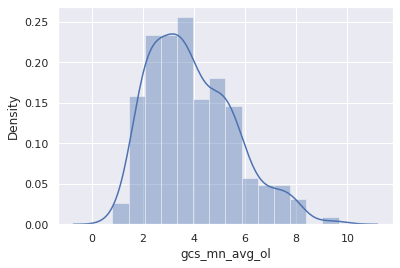

In [19]:
import seaborn as sns
sns.set()
_ = sns.distplot(Riv_schools.gcs_mn_avg_ol)

# Distribution for all the school levels (middle, elementary and high)

<AxesSubplot:>

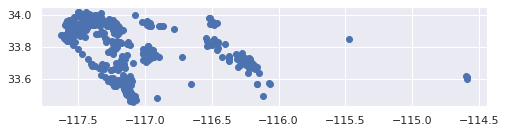

In [20]:
# Plot for the Riverside County ( we are seeting the size here to make the plot bigger)
fig, ax = plt.subplots(figsize=(8,8))
Riv_schools.plot(ax=ax)

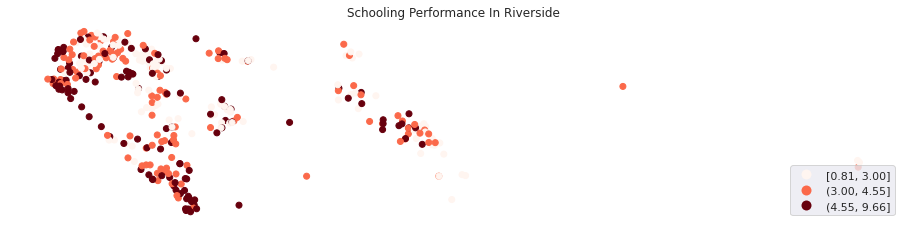

In [25]:
# we can create a choropleth - remove hashtag to see step by step
# riv_schools.plot(column='avgrdall', legend=True, figsize=(16,9))
# riv_schools.plot(column='avgrdall', legend=True, figsize=(16,9),
               #scheme='quantiles', k=3)
    
ax = Riv_schools.plot(column='gcs_mn_avg_ol', scheme='quantiles',k=3, legend=True,
             figsize=(16,9), cmap='Reds',
             legend_kwds={'loc': 'lower right'})
ax.set_title('Schooling Performance In Riverside' )
ax.set_axis_off()

<AxesSubplot:>

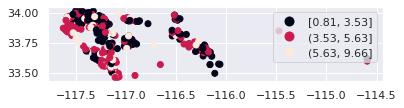

In [26]:
# Riverside Country Plot
Riv_schools.plot('gcs_mn_avg_ol',scheme='FisherJenks', k=3, legend=True)

In [27]:
# Upload school districts data

districts = gpd.read_parquet('s3://spatial-ucr/nces/districts/school_districts_1819.parquet')

In [28]:
# Locate Riverside Unified School District (RUSD)

rusd = districts[districts['NAME'].str.lower().str.contains('riverside unified')]

rusd

,STATEFP,ELSDLEA,SCSDLEA,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
1598,06,None,None,33150,0633150,Riverside Unified School District,00,KG,12,G5420,None,E,231195333.0,6617991.0,+33.9233125,-117.3778383,2019,2018-2019,"POLYGON ((-117.27942 34.00459, -117.27923 33.9..."
2344,20,None,None,00351,2000351,Riverside Unified School District 114,00,PK,12,G5420,None,E,217731318.0,7155066.0,+39.7879488,-094.9733667,2019,2018-2019,"POLYGON ((-94.87656 39.82088, -94.87654 39.820..."


In [29]:
# Below is the shape for RUSD

view(rusd, tooltip=True)

### VIEW RUSD DATA ONLY

In [32]:
# Now, let's overlay the two rusd and Riverside Schools

rusd_Schools = gpd.overlay(Riv_schools,rusd, how='intersection')

In [34]:
view(rusd_Schools, column='gcs_mn_avg_ol', scheme='quantiles', tooltip=['gcs_mn_avg_ol'])

In [36]:
view(rusd_Schools, marker_type='circle_marker', marker_kwds={'radius':10, "color":"blue", "fill":True}, popup='sedaschname')

In [42]:
# Creating GEOdataframe for only OC County
oc_schools = CA_sch[CA_sch.CNTY == '06059']
oc_schools.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
4073,060261000148,Barton (Clara) Elementary,6,CA,all,all,4.5,0,7187,71,...,1.062380,0.306724,0.071510,0.023057,0.064479,0.136651,060261000148,06059,Orange County,POINT (-117.95150 33.82297)
4074,060261000149,Edison (Thomas) Elementary,6,CA,all,all,4.5,0,9303,72,...,0.839463,0.279865,0.067434,0.021804,0.061014,0.129510,060261000149,06059,Orange County,POINT (-117.89713 33.85048)
4075,060261000150,Franklin (Benjamin) Elementary,6,CA,all,all,4.5,0,8534,70,...,0.862342,0.135698,0.071203,0.022973,0.065951,0.135739,060261000150,06059,Orange County,POINT (-117.91859 33.82812)
4076,060261000151,Gauer (Melbourne A.) Elementary,6,CA,all,all,4.5,0,7144,72,...,0.967620,0.558599,0.070335,0.022695,0.063698,0.134537,060261000151,06059,Orange County,POINT (-117.96710 33.84315)
4077,060261000152,Guinn (James M.) Elementary,6,CA,all,all,4.5,0,7909,68,...,1.027169,0.453072,0.075128,0.023868,0.064428,0.141595,060261000152,06059,Orange County,POINT (-117.88113 33.82258)


In [41]:
# Creating GEOdataframe for only LA County
la_schools = CA_sch[CA_sch.CNTY == '06037']
la_schools.head()

,sedasch,sedaschname,fips,stateabb,subcat,subgroup,gradecenter,gap,tot_asmts,cellcount,...,gcs_mn_grd_eb,gcs_mn_mth_eb,gcs_mn_avg_eb_se,gcs_mn_coh_eb_se,gcs_mn_grd_eb_se,gcs_mn_mth_eb_se,NCESSCH,CNTY,NMCNTY,geometry
3485,060000107534,Meadowlark Elementary,6,CA,all,all,4.0,0,3815,51,...,1.090237,-0.257467,0.086470,0.027348,0.093535,0.161691,060000107534,06037,Los Angeles County,POINT (-118.18562 34.47432)
3486,060000109444,High Desert,6,CA,all,all,7.0,0,4383,40,...,1.032473,-0.524962,0.094858,0.032063,0.094322,0.183542,060000109444,06037,Los Angeles County,POINT (-118.19474 34.49137)
3487,060000113828,Albert Einstein Acad Ltrs Arts Scis - Aqua Dul...,6,CA,all,all,5.5,0,608,27,...,NaN,NaN,0.326625,NaN,NaN,NaN,060000113828,06037,Los Angeles County,POINT (-118.33198 34.48820)
3585,060002503570,Aurelia Pennekamp Elementary,6,CA,all,all,4.0,0,4908,54,...,1.198238,-0.621758,0.083862,0.026933,0.091968,0.157638,060002503570,06037,Los Angeles County,POINT (-118.38902 33.87877)
3586,060002503573,Grand View Elementary,6,CA,all,all,4.0,0,6357,52,...,1.175983,-0.733920,0.089612,0.029577,0.092003,0.164965,060002503573,06037,Los Angeles County,POINT (-118.41262 33.89440)


<AxesSubplot:>

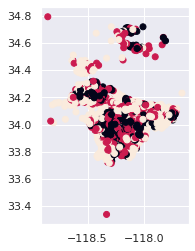

In [45]:
# LA County Schools Plots
la_schools.plot('gcs_mn_avg_ol', scheme='quantiles', k=3)

<AxesSubplot:>

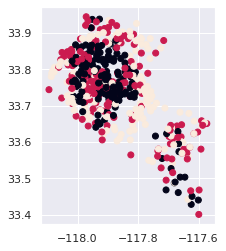

In [46]:
# OC County Schools Plots
oc_schools.plot('gcs_mn_avg_ol', scheme='quantiles', k=3)

### MAYBE WE CAN COMBINE the Covariates Data??

In [4]:
# Path for the covariates file
SEDA = pd.read_csv("https://stacks.stanford.edu/file/druid:db586ns4974/seda_cov_school_poolyr_4.0.csv",converters={"sedasch":str})

In [4]:
SEDA.sedasch=SEDA.sedasch.str.rjust(12, "0")

In [21]:
# First 5 observations , not sure what the last variable is avgrdall?? 
SEDA.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
0,010000500870,2009,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.066071,0.546429,0.547237,"Town, Fringe",NaN,NaN,NaN,NaN,NaN,280.0
1,010000500870,2010,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.073864,0.606061,0.588803,"Town, Distant",NaN,NaN,NaN,NaN,NaN,263.0
2,010000500870,2011,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.049296,0.647887,0.643357,"Town, Distant",NaN,NaN,NaN,NaN,NaN,284.0
3,010000500870,2012,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.082237,0.644737,0.641322,"Town, Distant",0.099836,0.08838,0.081833,0.0,0.0,303.5
4,010000500870,2013,Albertville Middle School,ALBERTVILLE,100005,1,AL,Regular School,Middle,7.0,...,0.057096,0.601958,0.633058,"Town, Distant",NaN,NaN,NaN,NaN,NaN,306.5


In [5]:
# Checking the type of dataframe
type(SEDA)

pandas.core.frame.DataFrame

## Cross-Sectional Data from SEDA 

Conversion to Cross-sectional for year = 2018 

In [6]:
SEDA_new = SEDA[SEDA.year == 2018]
SEDA_new.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,perrl,perfrl,perecd,locale,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall
9,010000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.064436,0.706320,0.386534,"Town, Distant",0.091698,0.065675,0.060719,0.000000,0.0,403.50
19,010000500879,2018,Evans Elementary School,Albertville,100005,1,AL,Regular School,Middle,5.0,...,0.042353,0.715294,0.431765,"Town, Distant",0.121780,0.121780,0.110070,0.100703,0.0,425.00
29,010000500889,2018,Albertville Elementary School,Albertville,100005,1,AL,Regular School,Elementary,3.0,...,0.045254,0.754967,0.451720,"Town, Distant",0.334437,0.086093,0.086093,0.088300,0.0,453.00
39,010000600193,2018,Kate Duncan Smith DAR Middle,Grant,100006,1,AL,Regular School,Middle,5.0,...,0.087760,0.554273,0.569124,"Rural, Distant",0.007177,0.153110,0.136364,0.071770,0.0,108.25
49,010000600872,2018,Asbury High School,Albertville,100006,1,AL,Regular School,High,3.0,...,0.081784,0.836431,0.898113,"Rural, Distant",0.069470,0.160878,0.157221,0.000000,0.0,88.00


In [31]:
SEDA_new.columns

Index(['sedasch', 'year', 'schnam', 'schcity', 'sedalea', 'fips', 'stateabb',
       'type', 'level', 'mingrd', 'maxgrd', 'charter', 'magnet', 'urbanicity',
       'totenrl', 'perwht', 'perind', 'perasn', 'perhsp', 'perblk', 'perfl',
       'perrl', 'perfrl', 'perecd', 'locale', 'lep', 'disab_tot',
       'disab_tot_idea', 'gifted_tot', 'sch_sped', 'avgrdall'],
      dtype='object')

## Converting SEDA into GeoDataframe

- We need schools data from NCES
- Obtaining geometry points from NCES and joining it with SEDA
- We will also retain county level information



In [22]:
# Retrieving data from NCES
schools = gpd.read_parquet("s3://spatial-ucr/nces/schools/schools_1819.parquet")


In [23]:
schools.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20617 34.26019)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20488 34.26223)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22014 34.27332)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22181 34.25270)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,...,2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.19329 34.28985)


In [32]:
sch_geoms = schools[['NCESSCH','CNTY','NMCNTY', 'geometry']]

In [33]:
sch_geoms.head()

,NCESSCH,CNTY,NMCNTY,geometry
0,010000500870,01095,Marshall County,POINT (-86.20617 34.26019)
1,010000500871,01095,Marshall County,POINT (-86.20488 34.26223)
2,010000500879,01095,Marshall County,POINT (-86.22014 34.27332)
3,010000500889,01095,Marshall County,POINT (-86.22181 34.25270)
4,010000501616,01095,Marshall County,POINT (-86.19329 34.28985)


In [34]:
# Merge the SEDA_new to NCES index
SEDA_2018 = SEDA_new.merge(sch_geoms, left_on="sedasch", right_on= "NCESSCH")

In [35]:
type(SEDA_2018)

pandas.core.frame.DataFrame

In [36]:
# Converting the data into GeoDataFrame
SEDA_2018= gpd.GeoDataFrame(SEDA_2018)

In [37]:
SEDA_2018.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall,NCESSCH,CNTY,NMCNTY,geometry
0,010000500870,2018,Albertville Middle School,Albertville,100005,1,AL,Regular School,Middle,7.0,...,0.091698,0.065675,0.060719,0.000000,0.0,403.50,010000500870,01095,Marshall County,POINT (-86.20617 34.26019)
1,010000500879,2018,Evans Elementary School,Albertville,100005,1,AL,Regular School,Middle,5.0,...,0.121780,0.121780,0.110070,0.100703,0.0,425.00,010000500879,01095,Marshall County,POINT (-86.22014 34.27332)
2,010000500889,2018,Albertville Elementary School,Albertville,100005,1,AL,Regular School,Elementary,3.0,...,0.334437,0.086093,0.086093,0.088300,0.0,453.00,010000500889,01095,Marshall County,POINT (-86.22181 34.25270)
3,010000600193,2018,Kate Duncan Smith DAR Middle,Grant,100006,1,AL,Regular School,Middle,5.0,...,0.007177,0.153110,0.136364,0.071770,0.0,108.25,010000600193,01095,Marshall County,POINT (-86.25409 34.53372)
4,010000600872,2018,Asbury High School,Albertville,100006,1,AL,Regular School,High,3.0,...,0.069470,0.160878,0.157221,0.000000,0.0,88.00,010000600872,01095,Marshall County,POINT (-86.14202 34.36255)


In [38]:
# Checking for Datatype
type(SEDA_2018)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

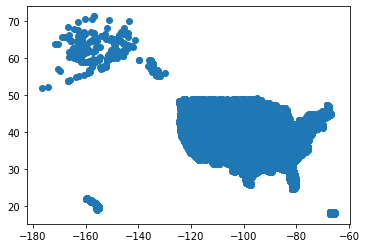

In [25]:
SEDA_2018.plot()

## Shrinking Dataset for California

In [40]:
# Subset of the california schools from the US data
cal_sch = SEDA_2018[SEDA_2018.stateabb == "CA"]
cal_sch.head()

,sedasch,year,schnam,schcity,sedalea,fips,stateabb,type,level,mingrd,...,lep,disab_tot,disab_tot_idea,gifted_tot,sch_sped,avgrdall,NCESSCH,CNTY,NMCNTY,geometry
3493,060000107534,2018,Meadowlark Elementary,Acton,600001,6,CA,Regular School,Elementary,3.0,...,0.200000,0.174419,0.167442,0.000000,0.0,79.333336,060000107534,06037,Los Angeles County,POINT (-118.18562 34.47432)
3494,060000109444,2018,High Desert,Acton,600001,6,CA,Regular School,Middle,5.0,...,0.155477,0.286219,0.257951,0.028269,0.0,92.666664,060000109444,06037,Los Angeles County,POINT (-118.19474 34.49137)
3495,060000113828,2018,Albert Einstein Acad Ltrs Arts Scis - Aqua Dul...,Agua Dulce,600001,6,CA,Regular School,Other,3.0,...,NaN,NaN,NaN,NaN,NaN,14.500000,060000113828,06037,Los Angeles County,POINT (-118.33198 34.48820)
3496,060000608773,2018,Manor Elementary,Fairfax,600006,6,CA,Regular School,Elementary,3.0,...,0.046693,0.136187,0.116732,0.000000,0.0,45.666668,060000608773,06041,Marin County,POINT (-122.59403 37.99720)
3497,060000608774,2018,White Hill Middle,Fairfax,600006,6,CA,Regular School,Middle,6.0,...,0.007407,0.135802,0.107407,0.000000,0.0,269.333340,060000608774,06041,Marin County,POINT (-122.60640 38.00312)


In [41]:
# Trying to find the county name and the corresponding index
cal_sch.loc[:,"NMCNTY"]

3493     Los Angeles County
3494     Los Angeles County
3495     Los Angeles County
3496           Marin County
3497           Marin County
                ...        
10601      Riverside County
10602     San Benito County
10603       Monterey County
10604       Tuolumne County
10605       Tuolumne County
Name: NMCNTY, Length: 7113, dtype: object

In [44]:
# Trying to find the ID number for the county,for Riverside we the ID is 06065/
cal_sch.loc[:,"CNTY"]

3493     06037
3494     06037
3495     06037
3496     06041
3497     06041
         ...  
10601    06065
10602    06069
10603    06053
10604    06109
10605    06109
Name: CNTY, Length: 7113, dtype: object

## ACS 
American Community Survey Data from Quilt to look at socio-economic variables of interest.
- Income
- Race 

In [9]:

import quilt3
b = quilt3.Bucket("s3://spatial-ucr")
b.fetch("census/acs/acs_2018_tract.parquet", "./acs_2018_tract.parquet")

100%|██████████| 575M/575M [00:06<00:00, 91.6MB/s]  


In [10]:
acs = gpd.read_parquet('./acs_2018_tract.parquet')
acs.head()

,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,n_recent_immigrant_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
GEOID,,,,,,,,,,,,,,,,,,,,,
02020001300,83.0,9.0,0.0,10.0,13.0,177.0,73.0,0.0,178.0,49.0,...,6.715702,3.952057,0.000000,0.000000,3.952057,0.000000,1.068999,0.000000,0.000000,"MULTIPOLYGON (((-149.98205 61.22613, -149.9676..."
02020001400,182.0,0.0,123.0,2.0,17.0,249.0,45.0,45.0,871.0,296.0,...,7.132950,18.109294,0.039888,2.951735,3.749501,12.584763,0.518548,1.196649,0.000000,"MULTIPOLYGON (((-149.91326 61.19631, -149.9132..."
02020001500,206.0,0.0,0.0,14.0,44.0,99.0,90.0,34.0,744.0,383.0,...,7.089829,5.586802,0.712411,0.000000,3.355831,0.000000,0.806149,0.712411,0.000000,"MULTIPOLYGON (((-149.86817 61.19528, -149.8681..."
02020001601,254.0,0.0,22.0,0.0,8.0,134.0,76.0,0.0,481.0,100.0,...,4.066042,4.160363,0.579929,0.176500,1.487645,0.277358,0.403429,0.327786,0.554715,"MULTIPOLYGON (((-149.83828 61.20771, -149.8380..."
02020001602,173.0,0.0,2.0,14.0,0.0,185.0,113.0,7.0,388.0,95.0,...,10.044944,5.344089,0.504159,0.403327,1.890597,0.680615,0.000000,0.932695,0.000000,"MULTIPOLYGON (((-149.83826 61.19537, -149.8377..."


In [14]:
# Looking at the columns information in the ACS data. 
acs.columns

Index(['GEOID', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop', 'n_foreign_born_pop',
       ...
       'p_veterans', 'p_poverty_rate', 'p_poverty_rate_over_65',
       'p_poverty_rate_children', 'p_poverty_rate_white',
       'p_poverty_rate_black', 'p_poverty_rate_hispanic',
       'p_poverty_rate_native', 'p_poverty_rate_asian', 'geometry'],
      dtype='object', length=156)

In [15]:
# Converting GEOID to from an index to a variable
acs = acs.reset_index()

In [16]:
acs.columns

Index(['index', 'GEOID', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_russian_pop', 'n_italian_pop', 'n_german_pop', 'n_irish_pop',
       'n_scandaniavian_pop',
       ...
       'p_veterans', 'p_poverty_rate', 'p_poverty_rate_over_65',
       'p_poverty_rate_children', 'p_poverty_rate_white',
       'p_poverty_rate_black', 'p_poverty_rate_hispanic',
       'p_poverty_rate_native', 'p_poverty_rate_asian', 'geometry'],
      dtype='object', length=157)